## SOFT DRINKS DISTRIBUTION

### The primary goal is to analyze sales performance across different products, regions, and suppliers to identify top and low-performing areas. This analysis will help us pinpoint which products and regions generate the most revenue and understand the factors influencing these variations. By gaining insights into high and low-performing regions and the success of suppliers, we aim to refine our marketing strategies, optimize product offerings, and strengthen supplier relationships to enhance overall business performance and competitiveness.

In [32]:
import pandas as pd
from sqlalchemy import create_engine
import pymysql
import numpy as np
import matplotlib.pyplot as plt
# Set up the database connection


### 1. Sales Performance and Market Penetration:
Value Statement: Understanding sales performance across different regions helps in tailoring marketing strategies and improving market penetration.
Business Question: Which regions have the highest and lowest sales performance, and what factors contribute to these variations?
Insight and Improvement: This query helps identify high and low-performing regions, allowing the company to investigate factors contributing to these variations and tailor marketing strategies accordingly.


### DATA EXPLORATION OR PROFILING
This is the process of analyzing and summarizing datasets and visualizing it. SQL is a powerful tool for data exploration. Data is explored using simple queries using dot oparators referencing columns by matching the primary key of each table and high level narrative of business description are below:

### DATABASE QUERIES

In [4]:
q4=""" SELECT COUNT(region) FROM region;"""


In [5]:
df=pd.read_sql(q4,engine)
df.head(20)

,COUNT(region)
0,4


In [9]:
q3=""" select COUNT(STATE) from market
 """
df=pd.read_sql(q3,engine)
df.head(20)

,COUNT(STATE)
0,20


In [7]:
q3_=""" select COUNT(DISTINCT FAMILY_ALIAS) AS product_type,COUNT(DISTINCT SKU_ALIAS) AS product_description 
from productdim """
df=pd.read_sql(q3_,engine)
df.head(20)

,product_type,product_description
0,5,13


In [39]:
q2="""SELECT DISTINCT FAMILY_ALIAS AS product_type, SKU_ALIAS AS product_description
FROM productdim;"""

In [40]:
df=pd.read_sql(q2,engine)
df.head(20)

,product_type,product_description
0,Colas,Cola
1,Colas,Diet Cola
2,Colas,Caffeine Free Cola
3,Root Beer,Old Fashioned
4,Root Beer,Diet Root Beer
5,Root Beer,Sasparilla
6,Root Beer,Birch Beer
7,Cream Soda,Dark Cream
8,Cream Soda,Vanilla Cream
9,Cream Soda,Diet Cream


In [79]:
q2="""SELECT DISTINCT r.REGION,m.STATE
FROM region r
INNER JOIN market m ON r.REGIONID = m.REGIONID;
;"""

In [80]:
df=pd.read_sql(q2,engine)
df.head(20)

,REGION,STATE
0,East,New York
1,East,Massachusetts
2,East,Florida
3,East,Connecticut
4,East,New Hampshire
5,West,California
6,West,Oregon
7,West,Washington
8,West,Utah
9,West,Nevada


In [6]:
q2="""SELECT SUM(s.SALES) AS total_sales, r.REGION, p.SKU_ALIAS AS product_description
FROM salesfact s
INNER JOIN market m 
ON s.STATEID = m.STATEID
INNER JOIN region r 
ON r.REGIONID = m.REGIONID
INNER JOIN product p 
ON s.PRODUCTID = p.PRODUCTID
GROUP BY r.REGION, p.SKU_ALIAS;"""

In [7]:
df=pd.read_sql(q2,engine)
df.head(50)

,total_sales,REGION,product_description
0,44595.0,East,Cola
1,15765.0,East,Old Fashioned
2,23060.0,East,Birch Beer
3,23042.0,East,Dark Cream
4,10105.0,East,Vanilla Cream
5,13998.0,East,Grape
6,6533.0,East,Orange
7,11444.0,East,Strawberry
8,5868.0,East,Diet Cola
9,7337.0,East,Diet Root Beer


C:\Users\Sruthi\AppData\Local\Temp\ipykernel_24760\766281352.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10', num_regions)


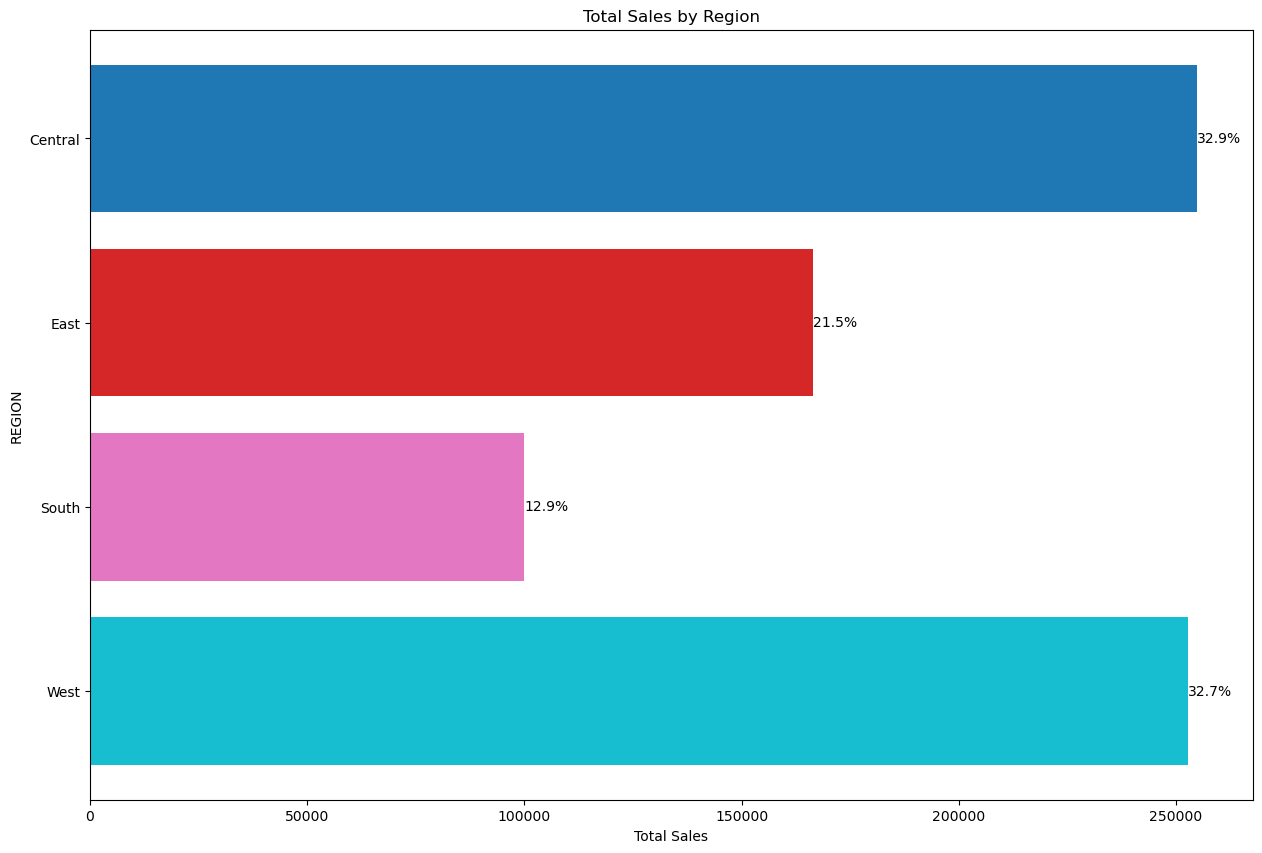

In [8]:
plt.figure(figsize=(15, 10))

# Get the number of unique regions
num_regions = len(df['REGION'].unique())
color_map = plt.cm.get_cmap('tab10', num_regions)

# Plotting
for i, (region, group_df) in enumerate(df.groupby('REGION')):
    color = color_map(i)  # Use the index directly for color mapping
    
    # Horizontal bar plot
    plt.barh(region, group_df['total_sales'].sum(), color=color)
    
    # Adding percentage text on each bar
    sales_percentage = group_df['total_sales'].sum() / df['total_sales'].sum() * 100
    plt.text(group_df['total_sales'].sum() + 50, i, f'{sales_percentage:.1f}%', va='center', color='black', fontsize=10)

plt.xlabel('Total Sales')
plt.ylabel('REGION')
plt.title('Total Sales by Region')

plt.gca().invert_yaxis()  # Invert y-axis to have the first region at the top

plt.show()

### DECISION
For the first business question, After analyzing the graph, to improve the business revenue, the top performing regions should be investigated more, to find out which products are the most sold and what makes the top performing regions holds first. The low performing regions can be further analyzed,to improve the process.Competitor analysis can be done.

### RESULT
From the above bar graph, We can say that the top performing regions are :California, New York, and Illinois lead in sales performance based on the results of the query. Some of the under-performing regions are: New hamshire and New mexico

### CONCLUSION:
Our business strategy is to improve the under performing region by looking for the competitors in those region and analyze why it is under performing. By looking at the top performing regions, our business strategy is to understand what are factors underlying for the top performing regions.

### 2. Product Performance and Consumer Preferences:
Value Statement: Analyzing product performance helps in understanding consumer preferences and optimizing product offerings.
Business Question: Which products have the highest sales volume and customer satisfaction, and how do these metrics correlate?
Insight and Improvement: This query identifies top-performing products and their customer satisfaction levels, helping the company focus on popular products and improve or phase out less popular ones.


### DATA EXPLORATION OR PROFILING
This is the process of analyzing and summarizing datasets and visualizing it. SQL is a powerful tool for data exploration. Data is explored using simple queries using dot oparators referencing columns by matching the primary key of each table and high level narrative of business description are below:

### DATABASE QUERIES

In [9]:
table_query = """SELECT 
    product_summary.product_id,
    product_summary.product_desc,
    SUM(product_summary.total_sales) AS total_sales
FROM (
    SELECT 
        p.PRODUCTID AS product_id,
        p.SKU_ALIAS AS product_desc,
        SUM(s.SALES) AS total_sales
        
    FROM 
        salesfact s
    JOIN 
        product p ON s.PRODUCTID = p.PRODUCTID
    JOIN 
        market m ON s.STATEID = m.STATEID
    JOIN 
        region r ON m.REGIONID = r.REGIONID
    GROUP BY 
        p.PRODUCTID, p.SKU_ALIAS
) AS product_summary
GROUP BY 
    product_summary.product_id, product_summary.product_desc
ORDER BY 
    total_sales DESC;"""

In [10]:
df=pd.read_sql(table_query,engine)
df.head(50)

,product_id,product_desc,total_sales
0,1,Cola,130014.0
1,8,Dark Cream,86106.0
2,4,Old Fashioned,83837.0
3,5,Diet Root Beer,76100.0
4,10,Diet Cream,68889.0
5,11,Grape,64479.0
6,2,Diet Cola,63989.0
7,12,Orange,58120.0
8,6,Sasparilla,32829.0
9,9,Vanilla Cream,31640.0


C:\Users\Sruthi\AppData\Local\Temp\ipykernel_24760\163053721.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10', num_products)


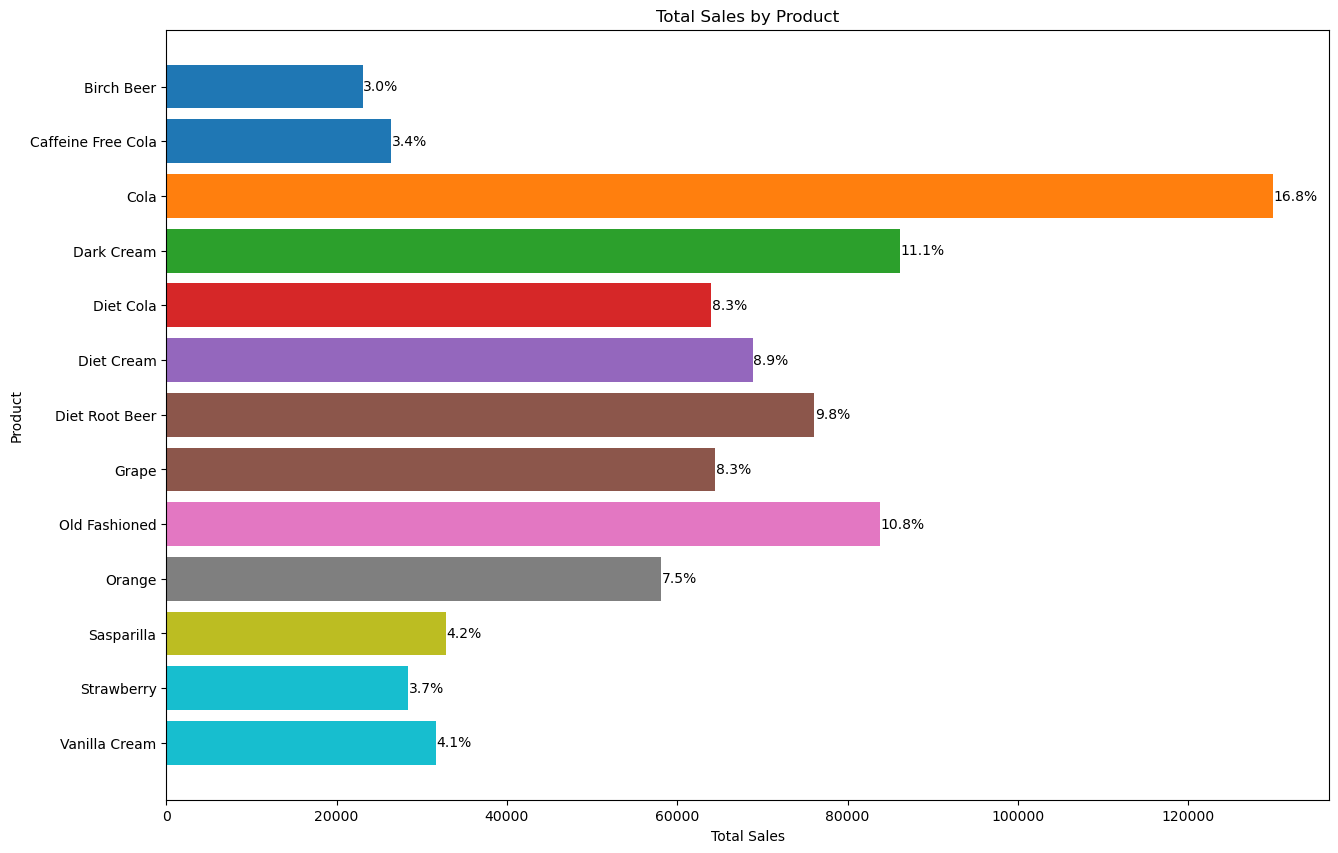

In [11]:
plt.figure(figsize=(15,10))
# Get the number of unique products

num_products = len(df['product_desc'].unique())
color_map = plt.cm.get_cmap('tab10', num_products)

# Plotting
for i, (product_desc, group_df) in enumerate(df.groupby('product_desc')):
    color = color_map(i)  # Use the index directly for color mapping
    
 # Horizontal bar plot
    plt.barh(product_desc, group_df['total_sales'].sum(), color=color)
    

# Adding percentage text on each bar
    sales_percentage = group_df['total_sales'].sum() / df['total_sales'].sum() * 100
    plt.text(group_df['total_sales'].sum() + 50, i, f'{sales_percentage:.1f}%', va='center', color='black', fontsize=10)
    
    plt.xlabel('Total Sales')
plt.ylabel('Product')
plt.title('Total Sales by Product')

plt.gca().invert_yaxis()  # Invert y-axis to have the first region at the top

plt.show()


C:\Users\Sruthi\AppData\Local\Temp\ipykernel_24760\502315892.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10', num_products)


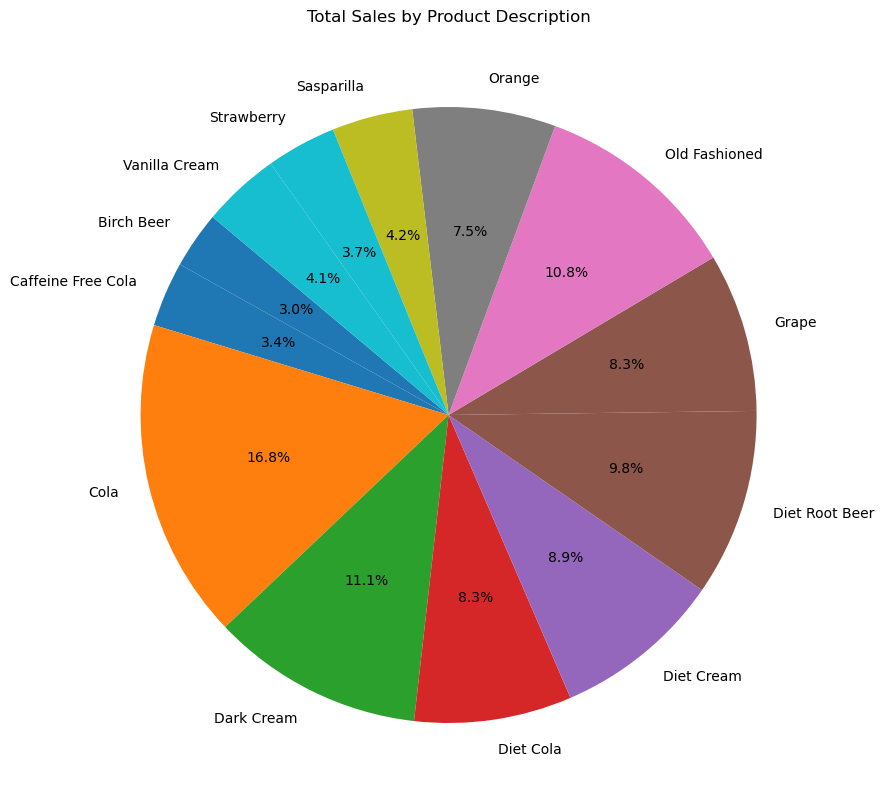

In [16]:
plt.figure(figsize=(15,10))
# Get the number of unique products
num_products = len(df['product_desc'].unique())
color_map = plt.cm.get_cmap('tab10', num_products)

# Group by product description and sum the total sales
grouped_df = df.groupby('product_desc')['total_sales'].sum().reset_index()

# Plotting
plt.pie(grouped_df['total_sales'], labels=grouped_df['product_desc'], colors=color_map(range(num_products)), autopct='%1.1f%%', startangle=140)

plt.title('Total Sales by Product Description')
plt.show()

### DECISION
For the second business question, After analyzing the graph, to improve the product performance and to increase the customer satisfaction, we identified the top performing products which will help us to analyze the product rankings and which products are mostly preffered by customers.

### RESULT
The Top performing products are Cola, Dark Cream, and Old Fashioned are the top three products based on the results of the query.The Product Cola holds the first rank in terms of sales by 16.8% and Dark cream holds the second place, by 11.1 % and old fashioned 10.8%. Some of the very low performing products are strawberry and sasparilla which is in between 3 to 4% .

### CONCLUSION:
By understanding the top and low product performance, we can come to a conclusion that which products are most sold and which are high demanded and stocked up in an inventory and as well as we need to have a customer centric approach,this will helps us in identifying the customer preference.

### 3. BUSINESS QUESTION
 Supplier Insights Across Regions

Business Question:

What suppliers are associated with the highest sales and how does it vary by region?
Value statement: Understanding the correlation between top-selling suppliers and regional sales variations empowers businesses to strategically allocate resources and strengthen supplier partnerships Insight and Improvement: Understanding these patterns can optimize supplier relationships and regional strategies for enhanced sales performance and targeted growth initiatives.

### DATA EXPLORATION OR PROFILING
This is the process of analyzing and summarizing datasets and visualizing it. SQL is a powerful tool for data exploration. Data is explored using simple queries and high level narrative of business description are below:

### DATABASE QUERIES

In [33]:
table_q="""SELECT 
    su.SUPPLIER_ALIAS AS supplier,
    p.SKU_ALIAS AS product_desc,
    SUM(s.SALES) AS total_sales
FROM 
    supplier su
INNER JOIN 
    salesfact s ON su.SUPPLIERID = s.SUPPLIERID
INNER JOIN
    product p ON s.PRODUCTID = p.PRODUCTID
GROUP BY 
    su.SUPPLIER_ALIAS, p.SKU_ALIAS
ORDER BY 
    total_sales DESC;"""

In [34]:
df=pd.read_sql(table_q,engine)
df.head(20)

,supplier,product_desc,total_sales
0,East Coast Beverage,Cola,45367.78
1,High Tech Drinks,Cola,44095.35
2,Cool Canadian,Cola,40550.87
3,High Tech Drinks,Old Fashioned,33027.10
4,High Tech Drinks,Dark Cream,29170.92
5,Cool Canadian,Dark Cream,28517.03
6,East Coast Beverage,Dark Cream,28418.05
7,Cool Canadian,Diet Root Beer,27720.82
8,Cool Canadian,Old Fashioned,25655.02
9,East Coast Beverage,Old Fashioned,25154.88


C:\Users\Sruthi\AppData\Local\Temp\ipykernel_11072\1708199163.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  color_map = plt.cm.get_cmap('tab10', num_suppliers)


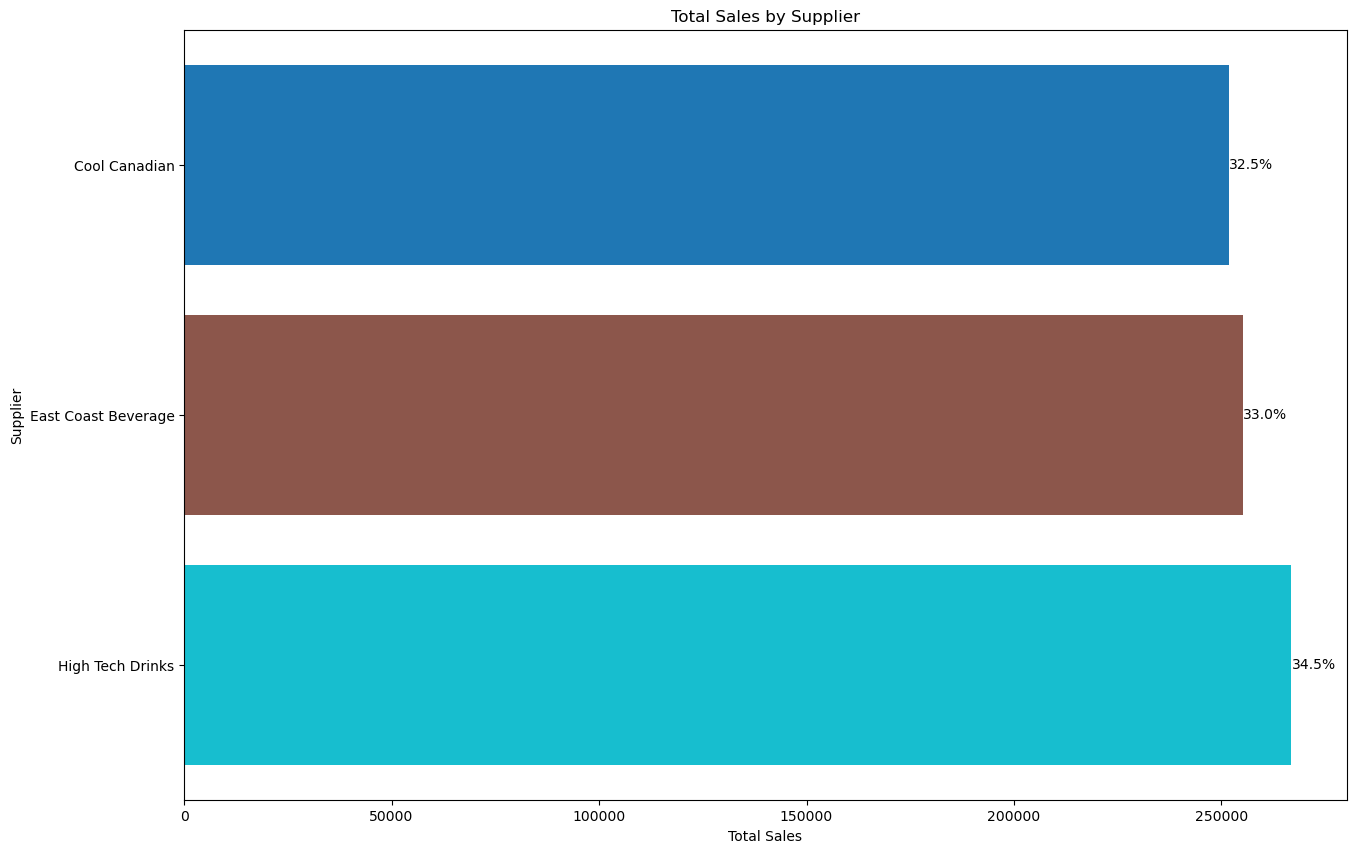

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))

# Get the number of unique suppliers
num_suppliers = len(df['supplier'].unique())
color_map = plt.cm.get_cmap('tab10', num_suppliers)

# Plotting
for i, (supplier_name, group_df) in enumerate(df.groupby('supplier')):
    color = color_map(i)  # Use the index directly for color mapping
    
    # Horizontal bar plot
    total_sales = group_df['total_sales'].sum()
    plt.barh(supplier_name, total_sales, color=color)
    
    # Adding percentage text on each bar
    sales_percentage = total_sales / df['total_sales'].sum() * 100
    plt.text(total_sales + 50, i, f'{sales_percentage:.1f}%', va='center', color='black', fontsize=10)
    
plt.xlabel('Total Sales')
plt.ylabel('Supplier')
plt.title('Total Sales by Supplier')

plt.gca().invert_yaxis()  # Invert y-axis to have the first supplier at the top

plt.show()


### DECISION
For the second business question, After analyzing the graph, to improve the supplier realtionship , we need to know who is our top suuplier and this decision help us in marketing strategy,we can build trust,improve customer statisfaction and meet compliance.

### RESULT
High Tech Drink emerges as the top supplier based on the analysis.

### CONCLUSION:
Knowing our suppliers are an important phase in business strategy, Knowing them and ranking them helps us to understand the top suppliers who are asscociated with us and which will result to have a strong relationship with them and ensuring a stable supply chain. Understanding thier background and culture helps us to rate them and pricing strategies help us in negotiating.its always good know thier new innovation and products to bring new business opportunity.